Some years back I went for a trip to Kodaikanal in Tamil Nadu.There we had a Fruit Milk Shake which the locals refered to as Butter Fruit.The fruit indeed tasted like Butter.The memory of the fruit remained fresh in my Memory.After many years I found out this fruit are called as Avacado.In this kernel we will be exploring and vizualizaing the dataset and try to Forecast the price of Avacados.This kernel is a work in process.If you like it please do vote.

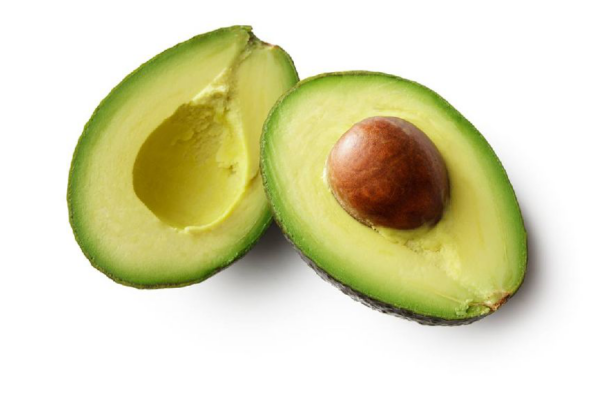

In [1]:
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline
import numpy as np
img=np.array(Image.open('../input/butter-fruit/Butter_fruit.jpg'))
fig=plt.figure(figsize=(10,10))
plt.imshow(img,interpolation='bilinear')
plt.axis('off')
plt.show()

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/butter-fruit/Butter_fruit.jpg
/kaggle/input/avocado-prices/avocado.csv


In [3]:
df=pd.read_csv('../input/avocado-prices/avocado.csv')
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In the data set we can see Region the Average price of Avacado every week.Price is that of a single Avacado.

**Summary of the DataSet**

In [4]:
print('Rows     :',df.shape[0])
print('Columns  :',df.shape[1])
print('\nFeatures :\n     :',df.columns.tolist())
print('\nMissing values    :',df.isnull().values.sum())
print('\nUnique values :  \n',df.nunique())

Rows     : 18249
Columns  : 14

Features :
     : ['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year', 'region']

Missing values    : 0

Unique values :  
 Unnamed: 0         53
Date              169
AveragePrice      259
Total Volume    18237
4046            17702
4225            18103
4770            12071
Total Bags      18097
Small Bags      17321
Large Bags      15082
XLarge Bags      5588
type                2
year                4
region             54
dtype: int64


Luckly there are no missing values in out datset 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
Unnamed: 0      18249 non-null int64
Date            18249 non-null object
AveragePrice    18249 non-null float64
Total Volume    18249 non-null float64
4046            18249 non-null float64
4225            18249 non-null float64
4770            18249 non-null float64
Total Bags      18249 non-null float64
Small Bags      18249 non-null float64
Large Bags      18249 non-null float64
XLarge Bags     18249 non-null float64
type            18249 non-null object
year            18249 non-null int64
region          18249 non-null object
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,18249.0,24.232232,1.548104e+01,0.00,10.00,24.00,38.00,52.00
AveragePrice,18249.0,1.405978,4.026766e-01,0.44,1.10,1.37,1.66,3.25
Total Volume,18249.0,850644.013009,3.453545e+06,84.56,10838.58,107376.76,432962.29,62505646.52
4046,18249.0,293008.424531,1.264989e+06,0.00,854.07,8645.30,111020.20,22743616.17
4225,18249.0,295154.568356,1.204120e+06,0.00,3008.78,29061.02,150206.86,20470572.61
4770,18249.0,22839.735993,1.074641e+05,0.00,0.00,184.99,6243.42,2546439.11
Total Bags,18249.0,239639.202060,9.862424e+05,0.00,5088.64,39743.83,110783.37,19373134.37
Small Bags,18249.0,182194.686696,7.461785e+05,0.00,2849.42,26362.82,83337.67,13384586.80
Large Bags,18249.0,54338.088145,2.439660e+05,0.00,127.47,2647.71,22029.25,5719096.61
XLarge Bags,18249.0,3106.426507,1.769289e+04,0.00,0.00,0.00,132.50,551693.65


Average Price of One avacado is 1.40 Dollars minimum price and maximum price being 0.44 and 3.25 respectively.

**Which Columns have Catogerical Data?**

In [7]:
df.select_dtypes(exclude=['int','float']).columns

Index(['Date', 'type', 'region'], dtype='object')

**Importing the Python Modules**

In [8]:
import random 
import seaborn as sns
from fbprophet import Prophet

**Exploring the dataset**

In [9]:
df.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


We need to sort the data properly for further analysis

In [10]:
df=df.sort_values('Date')
df.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
8574,0,2018-03-25,1.36,908202.13,142681.06,463136.28,174975.75,127409.04,103579.41,22467.04,1362.59,conventional,2018,Chicago
9018,0,2018-03-25,0.70,9010588.32,3999735.71,966589.50,30130.82,4014132.29,3398569.92,546409.74,69152.63,conventional,2018,SouthCentral
18141,0,2018-03-25,1.42,163496.70,29253.30,5080.04,0.00,129163.36,109052.26,20111.10,0.00,organic,2018,SouthCentral
17673,0,2018-03-25,1.70,190257.38,29644.09,70982.10,0.00,89631.19,89424.11,207.08,0.00,organic,2018,California
8814,0,2018-03-25,1.34,1774776.77,63905.98,908653.71,843.45,801373.63,774634.09,23833.93,2905.61,conventional,2018,NewYork


We have data from Jan 2015 to Mar 2018

**Average Price**

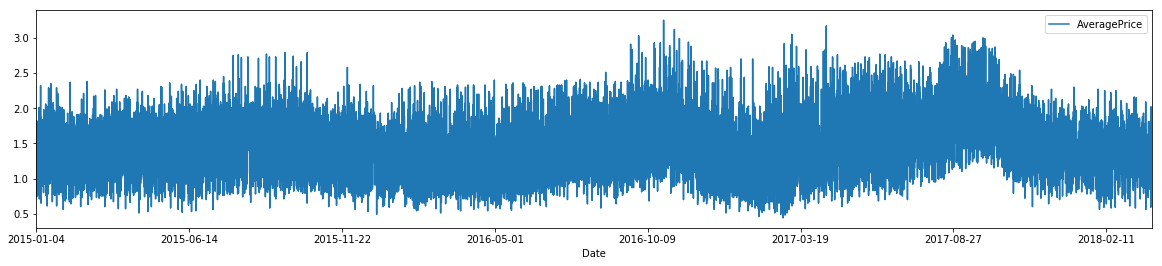

In [11]:
df.plot(x='Date', y='AveragePrice',legend=True,figsize=(20,4));
plt.ioff()

**Different Regions**

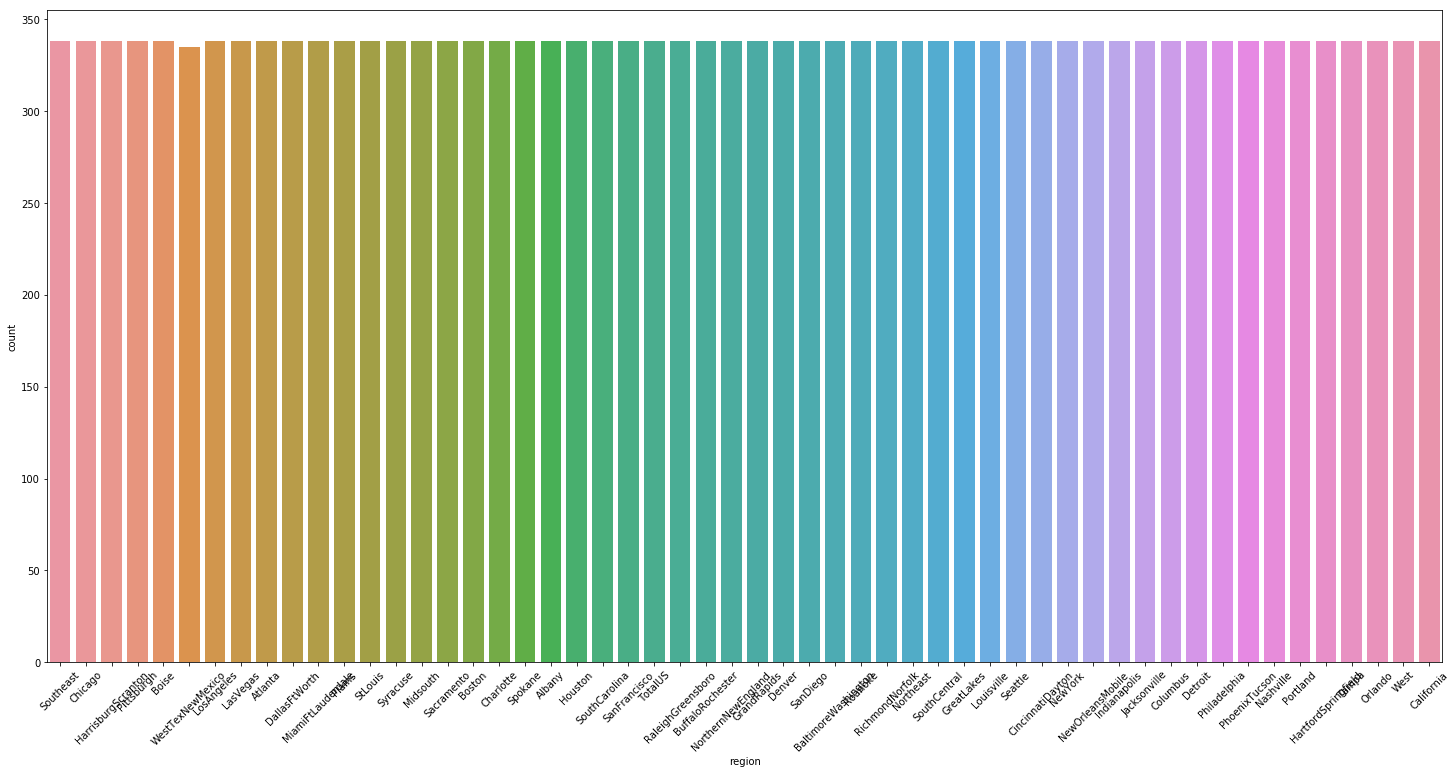

In [12]:
plt.figure(figsize=[25,12])
sns.countplot(x='region',data=df);
plt.xticks(rotation=45)
plt.ioff()

**Count based on year**

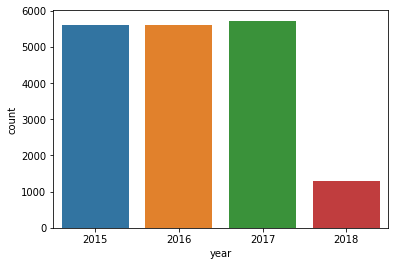

In [13]:
sns.countplot(x='year',data=df);

We see that that the bar for the year 2018 is short as we have data only upto march for the year 2018

* **Forecasting the Price of Avacado **

In [14]:
df_prophet=df[['Date','AveragePrice']]
df_prophet

,Date,AveragePrice
11569,2015-01-04,1.75
9593,2015-01-04,1.49
10009,2015-01-04,1.68
1819,2015-01-04,1.52
9333,2015-01-04,1.64
...,...,...
8574,2018-03-25,1.36
9018,2018-03-25,0.70
18141,2018-03-25,1.42
17673,2018-03-25,1.70


We have extracted the the Date and Average Price as this two information are only needed for us to forecast the price of Avacado

**Renaiming Columns to suite Prophet Algorithm**

In [15]:
df_prophet=df_prophet.rename(columns={'Date':'ds','AveragePrice':'y'})
df_prophet

,ds,y
11569,2015-01-04,1.75
9593,2015-01-04,1.49
10009,2015-01-04,1.68
1819,2015-01-04,1.52
9333,2015-01-04,1.64
...,...,...
8574,2018-03-25,1.36
9018,2018-03-25,0.70
18141,2018-03-25,1.42
17673,2018-03-25,1.70


In [16]:
m=Prophet()
m.fit(df_prophet)

In [17]:
future=m.make_future_dataframe(periods=365)
forecast=m.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,1.496497,0.904743,1.865047,1.496497,1.496497,-0.112593,-0.112593,-0.112593,-0.112593,-0.112593,-0.112593,0.0,0.0,0.0,1.383903
1,2015-01-04,1.496497,0.925222,1.838093,1.496497,1.496497,-0.112593,-0.112593,-0.112593,-0.112593,-0.112593,-0.112593,0.0,0.0,0.0,1.383903
2,2015-01-04,1.496497,0.917061,1.871975,1.496497,1.496497,-0.112593,-0.112593,-0.112593,-0.112593,-0.112593,-0.112593,0.0,0.0,0.0,1.383903
3,2015-01-04,1.496497,0.889552,1.882726,1.496497,1.496497,-0.112593,-0.112593,-0.112593,-0.112593,-0.112593,-0.112593,0.0,0.0,0.0,1.383903
4,2015-01-04,1.496497,0.921111,1.884493,1.496497,1.496497,-0.112593,-0.112593,-0.112593,-0.112593,-0.112593,-0.112593,0.0,0.0,0.0,1.383903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18609,2019-03-21,1.161789,0.545809,1.586158,0.975696,1.355395,-0.086185,-0.086185,-0.086185,-0.086185,-0.086185,-0.086185,0.0,0.0,0.0,1.075605
18610,2019-03-22,1.161059,0.536864,1.624507,0.974703,1.355596,-0.084525,-0.084525,-0.084525,-0.084525,-0.084525,-0.084525,0.0,0.0,0.0,1.076534
18611,2019-03-23,1.160328,0.553124,1.618527,0.973396,1.355796,-0.082593,-0.082593,-0.082593,-0.082593,-0.082593,-0.082593,0.0,0.0,0.0,1.077735
18612,2019-03-24,1.159597,0.566549,1.614311,0.971619,1.355973,-0.080408,-0.080408,-0.080408,-0.080408,-0.080408,-0.080408,0.0,0.0,0.0,1.079190


**Plotting the forecast**

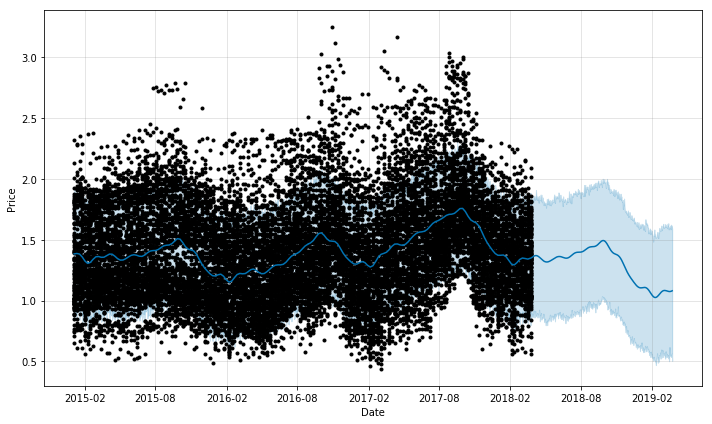

In [18]:
figure=m.plot(forecast,xlabel='Date',ylabel='Price')

So we can see from the graph that we had price for Avacado from Jan-2015 to Mar-2018.With the Prophet algorithm we are able to forecast the prices for the next years.We can see that the prediction is that the prices will go down.

**Plotting the components of the Forecast**

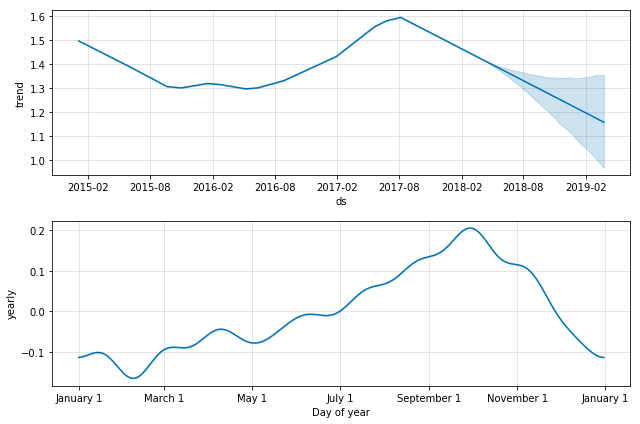

In [19]:
figure=m.plot_components(forecast)

1.The first graph shows the overall trend of the price in the data set and for the future forecast for one year.

2.The second graph show the seasonality of the price in a year,We can see that the price of Avacados Peak in the month of October

**Lets do a region wise Forecast**

In [20]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [21]:
df['region'].unique()

array(['Southeast', 'Chicago', 'HarrisburgScranton', 'Pittsburgh',
       'Boise', 'WestTexNewMexico', 'LosAngeles', 'LasVegas', 'Atlanta',
       'DallasFtWorth', 'MiamiFtLauderdale', 'Plains', 'StLouis',
       'Syracuse', 'Midsouth', 'Sacramento', 'Boston', 'Charlotte',
       'Spokane', 'Albany', 'Houston', 'SouthCarolina', 'SanFrancisco',
       'TotalUS', 'RaleighGreensboro', 'BuffaloRochester',
       'NorthernNewEngland', 'GrandRapids', 'Denver', 'SanDiego',
       'BaltimoreWashington', 'Roanoke', 'RichmondNorfolk', 'Northeast',
       'SouthCentral', 'GreatLakes', 'Louisville', 'Seattle',
       'CincinnatiDayton', 'NewYork', 'NewOrleansMobile', 'Indianapolis',
       'Jacksonville', 'Columbus', 'Detroit', 'Philadelphia',
       'PhoenixTucson', 'Nashville', 'Portland', 'HartfordSpringfield',
       'Tampa', 'Orlando', 'West', 'California'], dtype=object)

Lets select California as our region

In [22]:
region_sample=df[df['region']=='California']
region_sample.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
9489,51,2015-01-04,1.24,142349.77,107490.73,25711.96,2.93,9144.15,9144.15,0.00,0.00,organic,2015,California
363,51,2015-01-04,0.93,5777334.90,2843648.26,2267755.26,137479.64,528451.74,477193.38,47882.56,3375.80,conventional,2015,California
9488,50,2015-01-11,1.10,158110.68,123712.51,25975.27,1.47,8421.43,8421.43,0.00,0.00,organic,2015,California
362,50,2015-01-11,0.92,6024932.34,2889591.29,2485720.10,103573.42,546047.53,510560.41,31874.03,3613.09,conventional,2015,California
9487,49,2015-01-18,1.24,195207.60,123138.29,58616.16,0.00,13453.15,13453.15,0.00,0.00,organic,2015,California


Now we have only Data for California in our Dataset.

In [23]:
region_sample=region_sample.sort_values('Date')

**Average Price in California**

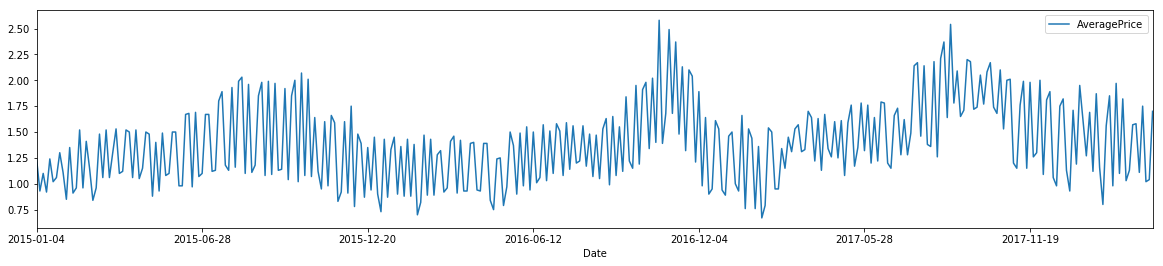

In [24]:
region_sample.plot(x='Date', y='AveragePrice',legend=True,figsize=(20,4));
plt.ioff()

* **Forecasting the Price of Avacado for Region of California **

In [25]:
region_sample=region_sample[['Date','AveragePrice']]
region_sample

,Date,AveragePrice
9489,2015-01-04,1.24
363,2015-01-04,0.93
9488,2015-01-11,1.10
362,2015-01-11,0.92
9487,2015-01-18,1.24
...,...,...
8552,2018-03-11,1.11
17674,2018-03-18,1.75
8551,2018-03-18,1.02
8550,2018-03-25,1.04


**Renaiming the Columns**

In [26]:
region_sample=region_sample.rename(columns={'Date':'ds','AveragePrice':'y'})
region_sample

,ds,y
9489,2015-01-04,1.24
363,2015-01-04,0.93
9488,2015-01-11,1.10
362,2015-01-11,0.92
9487,2015-01-18,1.24
...,...,...
8552,2018-03-11,1.11
17674,2018-03-18,1.75
8551,2018-03-18,1.02
8550,2018-03-25,1.04


In [27]:
m=Prophet()
m.fit(region_sample)
future=m.make_future_dataframe(periods=365)
forecast=m.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,1.303711,0.677915,1.574800,1.303711,1.303711,-0.180548,-0.180548,-0.180548,-0.180548,-0.180548,-0.180548,0.0,0.0,0.0,1.123163
1,2015-01-04,1.303711,0.674946,1.522382,1.303711,1.303711,-0.180548,-0.180548,-0.180548,-0.180548,-0.180548,-0.180548,0.0,0.0,0.0,1.123163
2,2015-01-11,1.303749,0.741658,1.547947,1.303749,1.303749,-0.174196,-0.174196,-0.174196,-0.174196,-0.174196,-0.174196,0.0,0.0,0.0,1.129553
3,2015-01-11,1.303749,0.671235,1.577390,1.303749,1.303749,-0.174196,-0.174196,-0.174196,-0.174196,-0.174196,-0.174196,0.0,0.0,0.0,1.129553
4,2015-01-18,1.303787,0.718543,1.533202,1.303787,1.303787,-0.195044,-0.195044,-0.195044,-0.195044,-0.195044,-0.195044,0.0,0.0,0.0,1.108743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
698,2019-03-21,1.792761,1.254997,2.087923,1.775617,1.810902,-0.122325,-0.122325,-0.122325,-0.122325,-0.122325,-0.122325,0.0,0.0,0.0,1.670436
699,2019-03-22,1.793207,1.264445,2.085386,1.776037,1.811443,-0.116054,-0.116054,-0.116054,-0.116054,-0.116054,-0.116054,0.0,0.0,0.0,1.677153
700,2019-03-23,1.793652,1.275091,2.066558,1.776444,1.811980,-0.109692,-0.109692,-0.109692,-0.109692,-0.109692,-0.109692,0.0,0.0,0.0,1.683960
701,2019-03-24,1.794098,1.257051,2.138650,1.776778,1.812497,-0.103308,-0.103308,-0.103308,-0.103308,-0.103308,-0.103308,0.0,0.0,0.0,1.690789


**Plotting the Forcast**

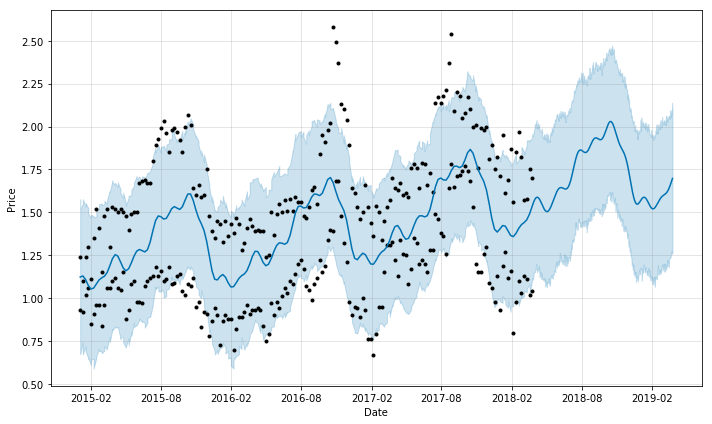

In [28]:
figure=m.plot(forecast,xlabel='Date',ylabel='Price')

So from the forecast Plot we can see that the Price of Avacado would increase in the coming year that is after Mar 2018.

**Plotting the Components of the Forecast**

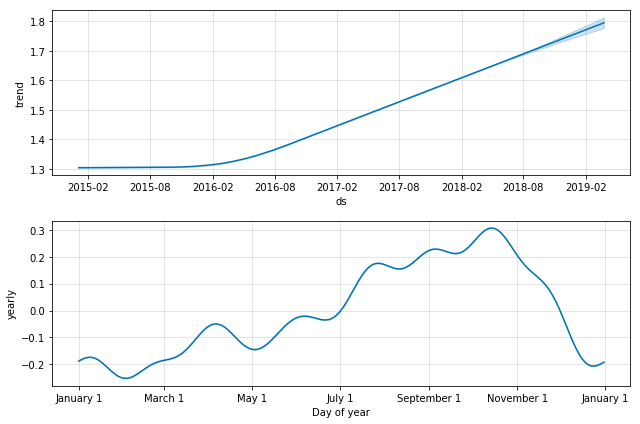

In [29]:
figure=m.plot_components(forecast)

The trend also shows that there will be increase in price of Avacado in California

The seasonality curve follows almost the same trend in California as in the rest of the country